# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
# TODO
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                 header=None,
                 names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])

print(df.shape)

df.head(10)

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [2]:
df.describe(include="all")


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [3]:
col_names = list(df.columns.values)
for name in col_names:
    print(name)
    print(df[name].value_counts())

A1
b    468
a    210
?     12
Name: A1, dtype: int64
A2
?        12
22.67     9
20.42     7
22.50     6
19.17     6
18.83     6
23.58     6
24.50     6
25.00     6
20.67     6
23.00     5
27.83     5
23.08     5
27.67     5
23.25     5
33.17     5
24.58     4
24.75     4
22.92     4
35.17     4
20.75     4
28.58     4
41.17     4
22.08     4
26.17     4
23.50     4
25.17     4
25.67     4
20.00     4
34.17     4
         ..
41.92     1
15.17     1
26.50     1
38.33     1
25.92     1
24.92     1
45.17     1
26.58     1
62.50     1
17.83     1
40.00     1
49.83     1
59.50     1
30.75     1
55.75     1
35.58     1
26.08     1
46.00     1
42.17     1
51.42     1
31.33     1
47.75     1
30.33     1
18.67     1
47.83     1
17.33     1
57.83     1
33.92     1
35.42     1
37.17     1
Name: A2, Length: 350, dtype: int64
A3
1.500     21
0.000     19
3.000     19
2.500     19
1.250     16
0.750     16
0.500     15
5.000     14
4.000     12
1.750     12
6.500     12
2.000     10
10.000    10
1.00

In [4]:
import numpy as np
df = df.replace({'?':np.NaN})
df.isna().sum()


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
conts = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
for col in col_names:
    if col in conts:
        df[col] =df[col].astype(float)
    else:
        df[col] =df[col].astype('category')
df.info()
"""
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)
""";

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null category
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null category
A5     684 non-null category
A6     681 non-null category
A7     681 non-null category
A8     690 non-null float64
A9     690 non-null category
A10    690 non-null category
A11    690 non-null float64
A12    690 non-null category
A13    690 non-null category
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null category
dtypes: category(10), float64(6)
memory usage: 41.1 KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

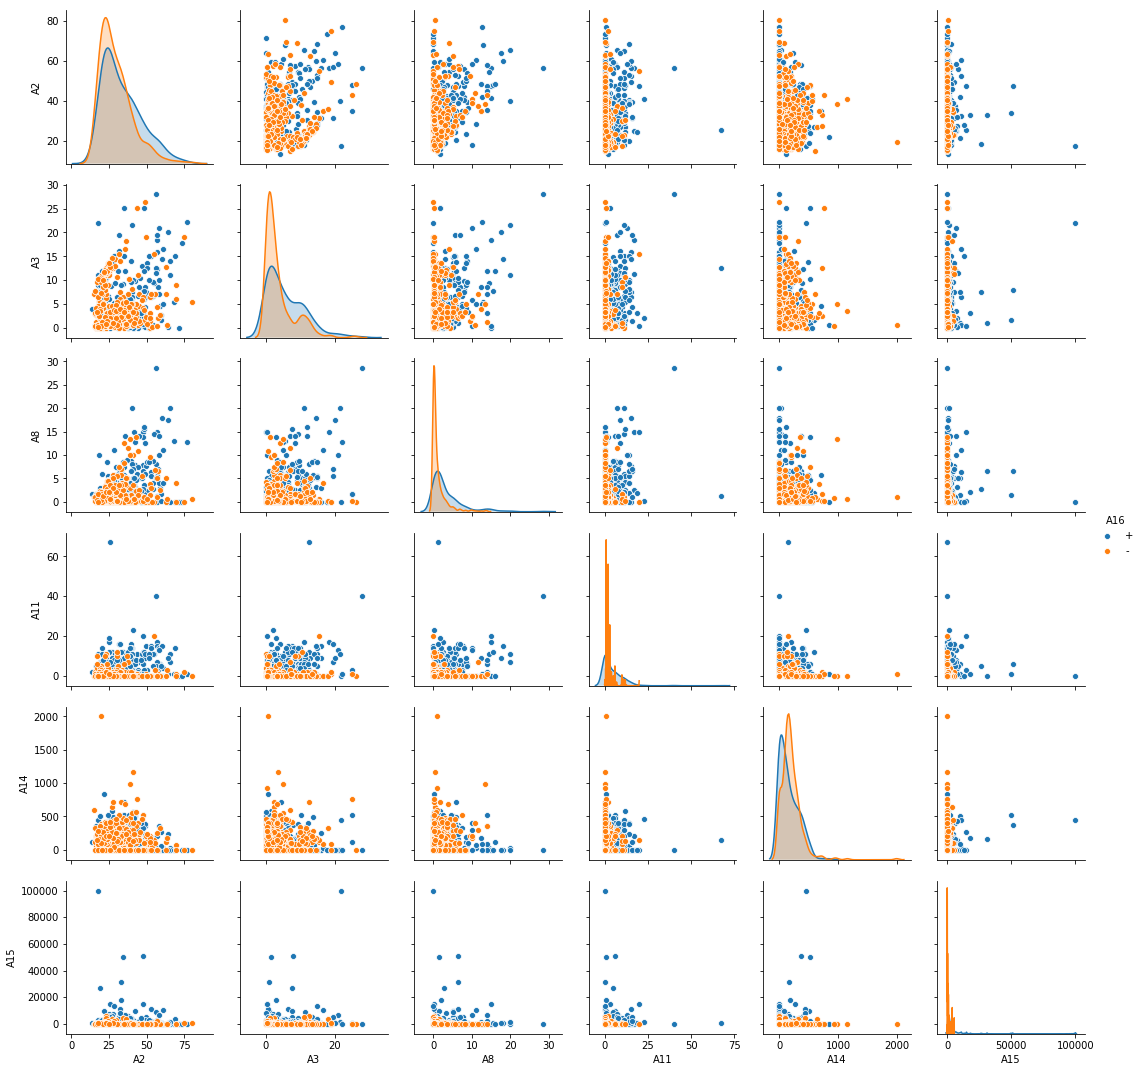

In [21]:
# TODO
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='A16');
plt.show();

In [7]:
df.groupby(by=['A16']).var()


,A2,A3,A8,A11,A14,A15
A16,,,,,,
+,164.086896,29.937148,16.980928,39.945456,26169.751384,5.867198e+07
-,119.230917,18.815311,4.496438,3.610187,32965.789440,4.510584e+05


In [8]:
df.groupby(by=df['A16']).mean()


,A2,A3,A8,A11,A14,A15
A16,,,,,,
+,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
-,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744


In [9]:
#split by A16 (positive/negative)
positive = df[df['A16'] == '+']
negative = df[df['A16'] == '-']
print(positive.shape, negative.shape)

(307, 16) (383, 16)


In [10]:
#mean diff
#table to show means of the continuous feature for + and - labels
df.groupby(by=['A16']).mean()



,A2,A3,A8,A11,A14,A15
A16,,,,,,
+,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
-,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744


In [11]:
#variance diff
df.groupby(by=['A16']).var()


,A2,A3,A8,A11,A14,A15
A16,,,,,,
+,164.086896,29.937148,16.980928,39.945456,26169.751384,5.867198e+07
-,119.230917,18.815311,4.496438,3.610187,32965.789440,4.510584e+05


In [12]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [13]:
from scipy import stats
#Ho - Not statistical difference between the positive and negative for the feature A11
t_stat, p_val = stats.ttest_ind(positive['A11'], negative['A11'])
print('Feature: A11')
print('T-test statistic: ', t_stat)
print('T-test p-value:    ', p_val)

Feature: A11
T-test statistic:  11.667004222431277
T-test p-value:     7.957718568079967e-29


In [14]:
#Means are very close maybe this time we'll get a higher p_value
#Ho - Not statistical difference between the positive and negative for the feature A11

t_stat, p_val = stats.ttest_ind(positive['A2'], negative['A2'], nan_policy='omit')
print('Feature: A11')
print('T-test statistic: ', t_stat)
print('T-test p-value:    ', p_val)

Feature: A11
T-test statistic:  4.2922156166315535
T-test p-value:     2.0276637071781407e-05


In [15]:
#Categorical features
cats = [col for col in col_names if col not in conts+['A16']]
cats

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

A1     a    b  All
A16               
+     98  206  304
-    112  262  374
All  210  468  678


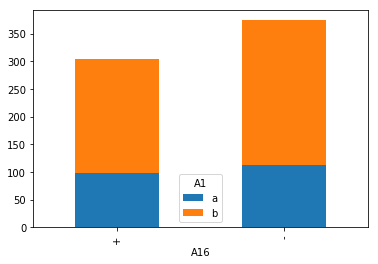

A4   l    u    y  All
A16                  
+    2  256   45  303
-    0  263  118  381
All  2  519  163  684


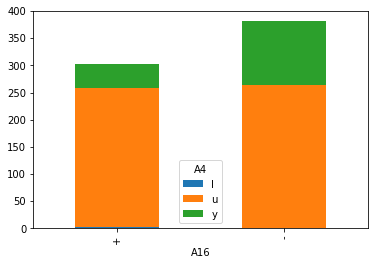

A5     g  gg    p  All
A16                   
+    256   2   45  303
-    263   0  118  381
All  519   2  163  684


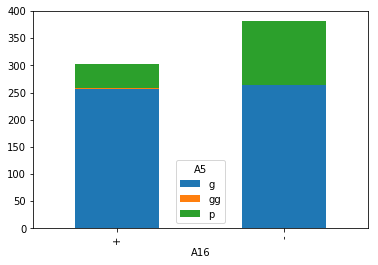

A6   aa    c  cc   d   e  ff   i   j   k   m   q  r   w   x  All
A16                                                             
+    19   62  29   7  14   7  14   3  14  16  51  2  33  32  303
-    35   75  12  23  11  46  45   7  37  22  27  1  31   6  378
All  54  137  41  30  25  53  59  10  51  38  78  3  64  38  681


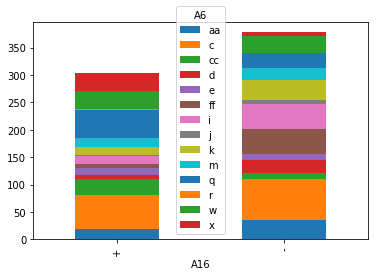

A7   bb  dd  ff    h  j  n  o    v  z  All
A16                                       
+    25   2   8   87  3  2  1  169  6  303
-    34   4  49   51  5  2  1  230  2  378
All  59   6  57  138  8  4  2  399  8  681


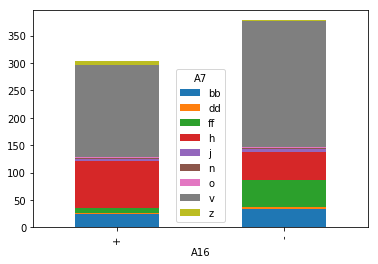

A9     f    t  All
A16               
+     23  284  307
-    306   77  383
All  329  361  690


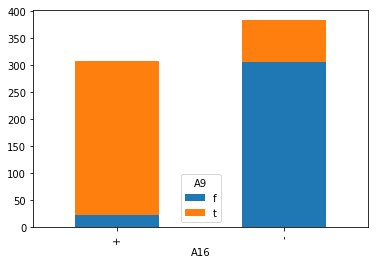

A10    f    t  All
A16               
+     98  209  307
-    297   86  383
All  395  295  690


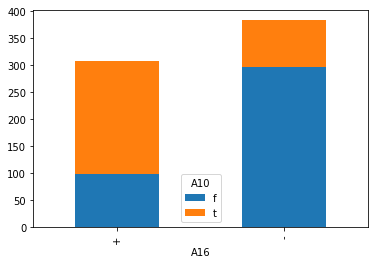

A12    f    t  All
A16               
+    161  146  307
-    213  170  383
All  374  316  690


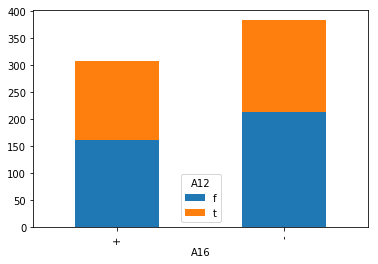

A13    g  p   s  All
A16                 
+    287  5  15  307
-    338  3  42  383
All  625  8  57  690


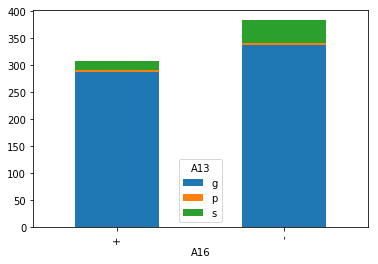

In [16]:
for feat in cats:
    print(pd.crosstab(df['A16'], df[feat], margins=True))
    pd.crosstab(df['A16'], df[feat]).plot(kind='bar', stacked=True)
    plt.show()

In [17]:
#Most extreme looking
#I'm expecting very low Pvalue
contingency =pd.crosstab(df['A16'], df['A9'])
contingency = contingency.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency)

print('Feature: A9')
print('Chi-Squared: ', chi_squared)
print('Pvalue: ', p_value)
print('Deg of Freedom: ', dof)


Feature: A9
Chi-Squared:  355.2038167412799
Pvalue:  3.1185900878457007e-79
Deg of Freedom:  1


In [18]:
# (one of) least extreme looking
contingency =pd.crosstab(df['A16'], df['A1'])
contingency = contingency.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency)

print('Feature: A1')
print('Chi-Squared: ', chi_squared)
print('Pvalue: ', p_value)
print('Deg of Freedom: ', dof)

Feature: A1
Chi-Squared:  0.31128326491619945
Pvalue:  0.5768937883001117
Deg of Freedom:  1


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

T-test: **A11, A2**

Both features correlate positively to having positive label on A16 (alpha = .05)


Chi-squared : **A9, A1**

A9 is a a very good indicator of wheater you'll get a + or - on label A16
t or f may mean something like not having a history of loan default which I would guess is a huge factor for accepting or rejecting credit.

(A1)The distribution of a and b's for A1 seams to be roughly equal for +/- label on A16. This is not a good indicator for predicting a +/- on A16 as reflected on the Pvalue.



A9     f    t  All
A16               
+     23  284  307
-    306   77  383
All  329  361  690


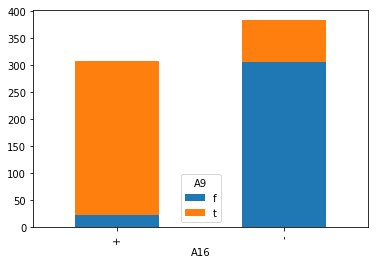

In [19]:
print(pd.crosstab(df['A16'], df['A9'], margins=True))
pd.crosstab(df['A16'], df['A9']).plot(kind='bar', stacked=True)
plt.show()

A1     a    b  All
A16               
+     98  206  304
-    112  262  374
All  210  468  678


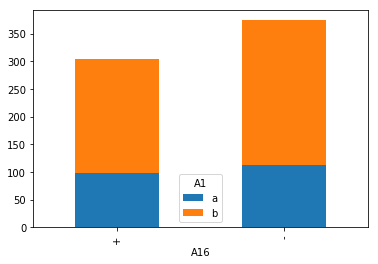

In [20]:
print(pd.crosstab(df['A16'], df['A1'], margins=True))
pd.crosstab(df['A16'], df['A1']).plot(kind='bar', stacked=True)
plt.show()

*Your words here!*